The main goal of this project is to perform extensive Exploratory Data Analysis(EDA) on the Zomato Dataset and build an appropriate Machine Learning Model that will help various Zomato Restaurants to predict their respective Ratings based on certain features.


Target Variable: rate

In [1]:

##Importing the packages
#Data processing packages
import numpy as np 
import pandas as pd 
import sys

#Visualization packages
import matplotlib.pyplot as plt 
import seaborn as sns 

#Machine Learning packages
from sklearn.svm import SVR,NuSVR
from xgboost import XGBRegressor

from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.decomposition import PCA

from sklearn import metrics

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/zomato.csv")

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [5]:
#helps in checking number of columns, number of rows and its data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
#to find number of rows and columns
df.shape

(51717, 17)

In [7]:
#to remove duplicate rows if any
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(51717, 17)

In [9]:
#to check number of null values in each column
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
#null values in percentage
(df.isna().sum()/len(df))*100

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

From the above analysis:
1. rate columns has 15% of missing values
2. dish_liked has 54% of missing values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [12]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [13]:
#to check number of occurence for each category
df.online_order.value_counts()

Yes    30444
No     21273
Name: online_order, dtype: int64

In [14]:
#to check the categories it has
df.online_order.unique()

array(['Yes', 'No'], dtype=object)

In [15]:
#to check if there is any null value in the particular column
df.online_order.isna().sum()

0

In [16]:
df.book_table.value_counts()

No     45268
Yes     6449
Name: book_table, dtype: int64

In [17]:
df.book_table.unique()

array(['Yes', 'No'], dtype=object)

In [18]:
df.book_table.isna().sum()

0

In [19]:
df.votes.unique()

array([ 775,  787,  918, ..., 4957, 2382,  843])

In [20]:
df.book_table.isna().sum()

0

From above analysis we can determine the following:
1. column: online_order: has 2 category (Yes, No) and it does not have any null values. It can also be determined as categorical column.
2. column: book_table: has 2 category (Yes, No) and it does not have any null values. It can also be determined as categorical column
3. column: votes: It has contineous data. No null values

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

Dropping the below columns from the dataset:
1. dish_liked: more than 50% data are missing. So if we fill the missing value, variance will increase
2. url: not required
3. address: can be determined with column 'listed_in(city)'
4. phone: not required to train our model
5. reviews_list: scope for later
6. menu_item: doesnot contain any valid data
7. location: can be determined with column 'listed_in(city)'


In [22]:
df.drop(['dish_liked','url','address','phone','reviews_list','menu_item','location'],axis=1,inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   rest_type                    51490 non-null  object
 6   cuisines                     51672 non-null  object
 7   approx_cost(for two people)  51371 non-null  object
 8   listed_in(type)              51717 non-null  object
 9   listed_in(city)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 4.3+ MB


In [24]:
#dropping all the rows with respect to null values in rate column
df.dropna(how='any',inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43533 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         43533 non-null  object
 1   online_order                 43533 non-null  object
 2   book_table                   43533 non-null  object
 3   rate                         43533 non-null  object
 4   votes                        43533 non-null  int64 
 5   rest_type                    43533 non-null  object
 6   cuisines                     43533 non-null  object
 7   approx_cost(for two people)  43533 non-null  object
 8   listed_in(type)              43533 non-null  object
 9   listed_in(city)              43533 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.7+ MB


In [26]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

After doing the above analysis and missing value treatment: we have zero null values and number of rows reduced to 43533

In [27]:
df.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


####Working with 'rate' column

In [28]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [29]:
#rate column contains '/5' which means out of 5, hence removing the same as it will be a problem to train the data
df['rate']=df['rate'].apply(lambda x: x.replace('/5',' ') if '/5' in str(x) else x )

In [30]:
#dropping the rows whcih contains data point as 'NEW'
df.drop(df[df['rate'] == 'NEW'].index, inplace = True)

In [31]:
#dropping the rows whcih contains data point as '-'
df.drop(df[df['rate'] == '-'].index, inplace = True)

In [32]:
df.rate.isnull().sum()

0

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41263 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         41263 non-null  object
 1   online_order                 41263 non-null  object
 2   book_table                   41263 non-null  object
 3   rate                         41263 non-null  object
 4   votes                        41263 non-null  int64 
 5   rest_type                    41263 non-null  object
 6   cuisines                     41263 non-null  object
 7   approx_cost(for two people)  41263 non-null  object
 8   listed_in(type)              41263 non-null  object
 9   listed_in(city)              41263 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.5+ MB


In [34]:
df.rate.unique()

array(['4.1 ', '3.8 ', '3.7 ', '3.6 ', '4.6 ', '4.0 ', '4.2 ', '3.9 ',
       '3.1 ', '3.0 ', '3.2 ', '3.3 ', '2.8 ', '4.4 ', '4.3 ', '2.9 ',
       '3.5 ', '2.6 ', '3.8  ', '3.4 ', '4.5 ', '2.5 ', '2.7 ', '4.7 ',
       '2.4 ', '2.2 ', '2.3 ', '3.4  ', '3.6  ', '4.8 ', '3.9  ', '4.2  ',
       '4.0  ', '4.1  ', '3.7  ', '3.1  ', '2.9  ', '3.3  ', '2.8  ',
       '3.5  ', '2.7  ', '2.5  ', '3.2  ', '2.6  ', '4.5  ', '4.3  ',
       '4.4  ', '4.9 ', '2.1 ', '2.0 ', '1.8 ', '4.6  ', '4.9  ', '3.0  ',
       '4.8  ', '2.3  ', '4.7  ', '2.4  ', '2.1  ', '2.2  ', '2.0  ',
       '1.8  '], dtype=object)

In [35]:
#converting rate column to float data type
df[['rate']] = df[['rate']].apply(pd.to_numeric)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41263 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         41263 non-null  object 
 1   online_order                 41263 non-null  object 
 2   book_table                   41263 non-null  object 
 3   rate                         41263 non-null  float64
 4   votes                        41263 non-null  int64  
 5   rest_type                    41263 non-null  object 
 6   cuisines                     41263 non-null  object 
 7   approx_cost(for two people)  41263 non-null  object 
 8   listed_in(type)              41263 non-null  object 
 9   listed_in(city)              41263 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.5+ MB


In [37]:
#renaming columns
df = df.rename(columns = {'approx_cost(for two people)': 'cost4two', 'listed_in(type)': 'Listed_as','listed_in(city)':'Place'}, inplace = False)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41263 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41263 non-null  object 
 1   online_order  41263 non-null  object 
 2   book_table    41263 non-null  object 
 3   rate          41263 non-null  float64
 4   votes         41263 non-null  int64  
 5   rest_type     41263 non-null  object 
 6   cuisines      41263 non-null  object 
 7   cost4two      41263 non-null  object 
 8   Listed_as     41263 non-null  object 
 9   Place         41263 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.5+ MB


####Working with cost4two column

In [39]:
df.cost4two.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800',
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

#####since cost4two cloumn contains ',' between numbers, we will clean the same

In [40]:
df['cost4two']=df['cost4two'].apply(lambda x: x.replace(',','') if ',' in str(x) else x )

In [41]:
df.cost4two.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '1100', '1600', '230', '130',
       '1700', '1350', '2200', '1400', '2000', '1800', '1900', '180',
       '330', '2500', '2100', '3000', '2800', '3400', '50', '40', '1250',
       '3500', '4000', '2400', '2600', '1450', '70', '3200', '240',
       '6000', '1050', '2300', '4100', '120', '5000', '3700', '1650',
       '2700', '4500', '80'], dtype=object)

In [42]:
df['cost4two']=df.cost4two.astype(int)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41263 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41263 non-null  object 
 1   online_order  41263 non-null  object 
 2   book_table    41263 non-null  object 
 3   rate          41263 non-null  float64
 4   votes         41263 non-null  int64  
 5   rest_type     41263 non-null  object 
 6   cuisines      41263 non-null  object 
 7   cost4two      41263 non-null  int64  
 8   Listed_as     41263 non-null  object 
 9   Place         41263 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 3.5+ MB


In [44]:
df.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
rest_type       0
cuisines        0
cost4two        0
Listed_as       0
Place           0
dtype: int64

In [45]:
#exporting cleaned data
df.to_csv('zomato_cleanData.csv')

####Now we can see data is cleaned, hence we can perform visualization on the same.

##Data Visualization

In [691]:
#Installing pandas profiling
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 34.6 MB 1.1 MB/s
     |████████████████████████████████| 10.1 MB 4.3 MB/s 
     |████████████████████████████████| 636 kB 68.5 MB/s 
     |████████████████████████████████| 102 kB 66.5 MB/s 
     |████████████████████████████████| 675 kB 44.3 MB/s 
     |████████████████████████████████| 3.1 MB 35.5 MB/s 
     |████████████████████████████████| 62 kB 864 kB/s 
     |████████████████████████████████| 812 kB 57.9 MB/s 
     |████████████████████████████████| 28.5 MB 47 kB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248524 sha256=4c592864bd45bf5a609f59e523747ef981374de50cf5bb429c5a7974c891bffc
  Stored in directory: /tmp/pip-ephem-wheel-cache-5qxlnqxw/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=3c2c1c677f5d11d53e95292506dad3fff9423584053af41439d0332956726004
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d

In [46]:
import pandas_profiling as pp

In [47]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##Encoding the data

#####Function to group certain category to "others" with respect to frequency threshold

In [595]:
def create_other(df,variable,threshold):
  global lessthan
  var = df[variable].value_counts(ascending=False)
  lessthan = var[var<threshold]

  def handle(value):
    if(value in lessthan):
      return 'others'
    else:
      return value

  df[variable]=df[variable].map(handle)

#####Function to convert feature to ordinal number encoding with respect to frequency of the category

In [596]:
def conv_ord(df,variable):
  ordinal=df.groupby([variable])['rate'].mean().sort_values().index
  ordinal_label={k:i for i,k in enumerate(ordinal,0)}
  df[variable]=df[variable].map(ordinal_label)

In [597]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41263 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41263 non-null  object 
 1   online_order  41263 non-null  object 
 2   book_table    41263 non-null  object 
 3   rate          41263 non-null  float64
 4   votes         41263 non-null  int64  
 5   rest_type     41263 non-null  object 
 6   cuisines      41263 non-null  object 
 7   cost4two      41263 non-null  int64  
 8   Listed_as     41263 non-null  object 
 9   Place         41263 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 3.5+ MB


####Encoding name,rest_type,cuisines,Listed_as columns

In [598]:
df.name.value_counts()

Cafe Coffee Day                                                                                                                              86
Onesta                                                                                                                                       85
Empire Restaurant                                                                                                                            69
Kanti Sweets                                                                                                                                 68
Five Star Chicken                                                                                                                            68
                                                                                                                                             ..
Esplanade                                                                                                                               

In [599]:
df.rest_type.value_counts()

Quick Bites                  13885
Casual Dining                 9614
Cafe                          3369
Dessert Parlor                1850
Delivery                      1667
                             ...  
Bakery, Food Court               2
Food Court, Beverage Shop        2
Cafe, Food Court                 2
Quick Bites, Kiosk               1
Bakery, Beverage Shop            1
Name: rest_type, Length: 87, dtype: int64

In [600]:
df.cuisines.value_counts()

North Indian                                   2108
North Indian, Chinese                          1953
South Indian                                   1232
Cafe                                            620
Bakery, Desserts                                613
                                               ... 
Cafe, Italian, Continental, European              1
Street Food, Chinese, Italian, North Indian       1
Fast Food, Biryani, Seafood, South Indian         1
Oriya, South Indian, Fast Food                    1
Chinese, Thai, Pan Asian                          1
Name: cuisines, Length: 2367, dtype: int64

In [601]:
for feature in ['name','rest_type','cuisines']:
  if feature == 'name':
    create_other(df,'name',5)
  elif feature == 'rest_type':
    create_other(df,'rest_type',1000)
  else:
    create_other(df,'cuisines',100)

In [602]:
df['name'].value_counts()

others                 9072
Cafe Coffee Day          86
Onesta                   85
Empire Restaurant        69
Five Star Chicken        68
                       ... 
Ozaa                      5
Bowring Kulfi             5
Nutrition on Wheels       5
Ganesh Bhavan             5
Mizo Kitchen              5
Name: name, Length: 2973, dtype: int64

In [603]:
df['rest_type'].value_counts()

Quick Bites           13885
Casual Dining          9614
others                 8507
Cafe                   3369
Dessert Parlor         1850
Delivery               1667
Takeaway, Delivery     1279
Casual Dining, Bar     1092
Name: rest_type, dtype: int64

In [604]:
df['cuisines'].value_counts()

others                                23154
North Indian                           2108
North Indian, Chinese                  1953
South Indian                           1232
Cafe                                    620
                                      ...  
Chinese, Thai, Momos                    110
North Indian, Chinese, Continental      105
Andhra, Biryani                         104
Italian, Pizza                          101
Cafe, Bakery                            100
Name: cuisines, Length: 62, dtype: int64

In [605]:
for feature in ['name','rest_type','cuisines','Listed_as']:
  conv_ord(df,feature)

In [606]:
df.head(10)

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost4two,Listed_as,Place
0,2524,Yes,Yes,4.1,775,3,51,800,4,Banashankari
1,1004,Yes,No,4.1,787,3,51,800,4,Banashankari
2,1659,Yes,No,3.8,918,4,51,800,4,Banashankari
3,1004,No,No,3.7,88,1,16,300,4,Banashankari
4,1004,No,No,3.8,166,3,51,600,4,Banashankari
5,1744,Yes,No,3.8,286,3,28,600,4,Banashankari
6,1004,No,No,3.6,8,3,51,800,4,Banashankari
7,2881,Yes,Yes,4.6,2556,4,51,600,3,Banashankari
8,2240,Yes,No,4.0,324,5,51,700,3,Banashankari
9,2590,Yes,No,4.2,504,5,51,550,3,Banashankari


In [607]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41263 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41263 non-null  int64  
 1   online_order  41263 non-null  object 
 2   book_table    41263 non-null  object 
 3   rate          41263 non-null  float64
 4   votes         41263 non-null  int64  
 5   rest_type     41263 non-null  int64  
 6   cuisines      41263 non-null  int64  
 7   cost4two      41263 non-null  int64  
 8   Listed_as     41263 non-null  int64  
 9   Place         41263 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 3.5+ MB


####Encoding Place column

In [608]:
df.Place.value_counts()

BTM                      2586
Koramangala 7th Block    2361
Koramangala 4th Block    2254
Koramangala 5th Block    2250
Koramangala 6th Block    2121
Jayanagar                1918
JP Nagar                 1633
Indiranagar              1538
Church Street            1518
MG Road                  1514
Brigade Road             1483
Lavelle Road             1451
Residency Road           1345
HSR                      1330
Marathahalli             1294
Bannerghatta Road        1208
Whitefield               1201
Old Airport Road         1173
Brookefield              1139
Basavanagudi             1072
Kammanahalli             1020
Sarjapur Road            1018
Kalyan Nagar              993
Bellandur                 956
Frazer Town               953
Malleshwaram              946
Rajajinagar               872
Electronic City           820
Banashankari              727
New BEL Road              569
Name: Place, dtype: int64

In [609]:
len(df.Place.unique())

30

In [610]:
#creating a dictionary, where key is place name and value is frequency of that place
location_map=df['Place'].value_counts().to_dict()

In [611]:
location_map

{'BTM': 2586,
 'Banashankari': 727,
 'Bannerghatta Road': 1208,
 'Basavanagudi': 1072,
 'Bellandur': 956,
 'Brigade Road': 1483,
 'Brookefield': 1139,
 'Church Street': 1518,
 'Electronic City': 820,
 'Frazer Town': 953,
 'HSR': 1330,
 'Indiranagar': 1538,
 'JP Nagar': 1633,
 'Jayanagar': 1918,
 'Kalyan Nagar': 993,
 'Kammanahalli': 1020,
 'Koramangala 4th Block': 2254,
 'Koramangala 5th Block': 2250,
 'Koramangala 6th Block': 2121,
 'Koramangala 7th Block': 2361,
 'Lavelle Road': 1451,
 'MG Road': 1514,
 'Malleshwaram': 946,
 'Marathahalli': 1294,
 'New BEL Road': 569,
 'Old Airport Road': 1173,
 'Rajajinagar': 872,
 'Residency Road': 1345,
 'Sarjapur Road': 1018,
 'Whitefield': 1201}

In [612]:
#now replacing that Place column with frequency of place name
df['Place']=df['Place'].map(location_map)

In [613]:
df.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost4two,Listed_as,Place
0,2524,Yes,Yes,4.1,775,3,51,800,4,727
1,1004,Yes,No,4.1,787,3,51,800,4,727
2,1659,Yes,No,3.8,918,4,51,800,4,727
3,1004,No,No,3.7,88,1,16,300,4,727
4,1004,No,No,3.8,166,3,51,600,4,727


In [614]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41263 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41263 non-null  int64  
 1   online_order  41263 non-null  object 
 2   book_table    41263 non-null  object 
 3   rate          41263 non-null  float64
 4   votes         41263 non-null  int64  
 5   rest_type     41263 non-null  int64  
 6   cuisines      41263 non-null  int64  
 7   cost4two      41263 non-null  int64  
 8   Listed_as     41263 non-null  int64  
 9   Place         41263 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 3.5+ MB


####Encoding  online_order,book_table column using one hot encoding

In [615]:
df['online_order'] = pd.get_dummies(df['online_order'],drop_first=True)

In [616]:
df['book_table'] = pd.get_dummies(df['book_table'],drop_first=True)

In [617]:
df.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost4two,Listed_as,Place
0,2524,1,1,4.1,775,3,51,800,4,727
1,1004,1,0,4.1,787,3,51,800,4,727
2,1659,1,0,3.8,918,4,51,800,4,727
3,1004,0,0,3.7,88,1,16,300,4,727
4,1004,0,0,3.8,166,3,51,600,4,727


##Plotting Correlation Matrix

In [618]:
corr=df.corr()

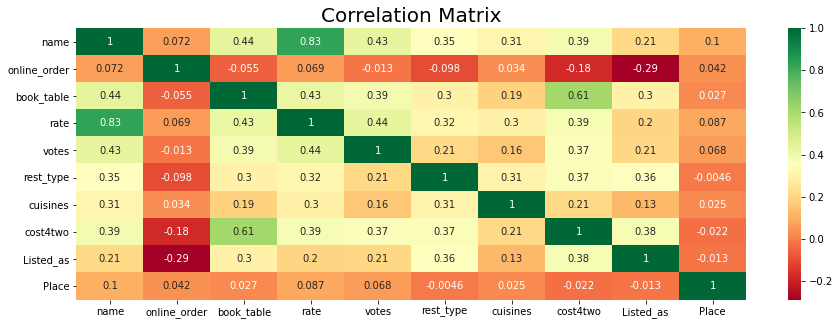

In [619]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))
sns.heatmap(corr,cmap='RdYlGn', annot = True)
plt.title('Correlation Matrix',fontsize=20)
plt.show()

##Model Implementation

In [620]:
#Separating Feature and Target matrices
X = df.drop(['rate'],axis=1)
y = df[['rate']]

In [621]:
# Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=df['rate'])

In [622]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33010, 9)
(8253, 9)
(33010, 1)
(8253, 1)


####Now we will perform the following task:
  1. pipeline creation 
  2. data preprocessing 
  3. apply classification

In [623]:
from sklearn.pipeline import Pipeline

In [624]:
pipeline_lr=Pipeline([('scaler1',StandardScaler()),
                      ('pca1',PCA(n_components=9)),
                      ('lr_regressor',LinearRegression())])

In [625]:
pipeline_svr=Pipeline([('scaler2',StandardScaler()),
                      ('pca2',PCA(n_components=9)),
                      ('svr_regressor',SVR())])

In [626]:
pipeline_dt=Pipeline([('scaler3',StandardScaler()),
                      ('pca3',PCA(n_components=9)),
                      ('dt_regressor',DecisionTreeRegressor(max_depth=3,random_state=42))])

In [627]:
pipeline_rf=Pipeline([('scaler4',StandardScaler()),
                      ('pca4',PCA(n_components=9)),
                      ('rf_regressor',RandomForestRegressor(random_state = 42))])

In [628]:
pipeline_xgb=Pipeline([('scaler5',StandardScaler()),
                      ('pca5',PCA(n_components=9)),
                      ('xgb_regressor',XGBRegressor(random_state=42))])

In [629]:
pipelines=[pipeline_lr,pipeline_svr,pipeline_dt,pipeline_rf,pipeline_xgb]

In [638]:
best_accuracy_score=0.0
best_Regressor=0
best_pipeline=""

In [639]:
pipe_dic={0:'Linear regression',1:'SVR',2:'Decision Tree',3:'Random Forest',4:'XGBoost'}

for pipe in pipelines:
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)

[06:43:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [640]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dic[i],model.score(X_test,y_test)))
    print("{} Train Accuracy: {}".format(pipe_dic[i],model.score(X_train,y_train)))
    print("{} R2 Score: {}".format(pipe_dic[i],metrics.r2_score(y_test,y_pred)*100))

Linear regression Test Accuracy: 0.7053812732876652
Linear regression Train Accuracy: 0.6987136478716118
Linear regression R2 Score: 73.5029472121131
SVR Test Accuracy: 0.7826584656178065
SVR Train Accuracy: 0.7839624775591514
SVR R2 Score: 73.5029472121131
Decision Tree Test Accuracy: 0.5195407838437286
Decision Tree Train Accuracy: 0.5241304696726676
Decision Tree R2 Score: 73.5029472121131
Random Forest Test Accuracy: 0.8090610375389379
Random Forest Train Accuracy: 0.972553377794681
Random Forest R2 Score: 73.5029472121131
XGBoost Test Accuracy: 0.735029472121131
XGBoost Train Accuracy: 0.7398651763968617
XGBoost R2 Score: 73.5029472121131


In [641]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_regressor=i
print('Regressor with best accuracy score:{}'.format(pipe_dic[best_regressor]))

Regressor with best accuracy score:Random Forest
